# 5. 기하학적 변환

## 5.1 이동, 확대/축소, 회전

### 5.1.1 이동

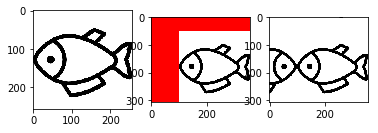

In [6]:
# 예제 5-1 평행 이동(translate.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/fish.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# ---① 변환 행렬 생성 
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])  
# ---② 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))   

# ---③ 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# ---④ 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

cv2.imshow('original', img)
cv2.imshow('trans',dst)
cv2.imshow('BORDER_CONSTATNT', dst2)
cv2.imshow('BORDER_FEFLECT', dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(dst2)
plt.subplot(133)
plt.imshow(dst3)
plt.show()

cv2.warpAffine()함수를 통해 영상을 2*3 변환행렬을 가지고 이동

### 5.1.2 확대/축소

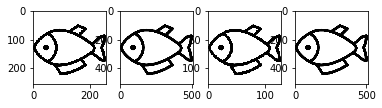

In [7]:
# 예제 5-2 행렬을 이용한 확대와 축소(scale_matrix.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/fish.jpg')
height, width = img.shape[:2]

# --① 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])  
# --② 2배 확대 변환 행렬
m_big = np.float32([[2, 0, 0],
                     [0, 2, 0]])  

# --③ 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

# --④ 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.imshow("small INTER_AREA", dst3)
cv2.imshow("big INTER_CUBIC", dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(dst2)
plt.subplot(143)
plt.imshow(dst3)
plt.subplot(144)
plt.imshow(dst4)
plt.show()

cv2.warpAffine() 함수를 통해 영상을 2*3 변환행렬을 가지고 확대 및 축소

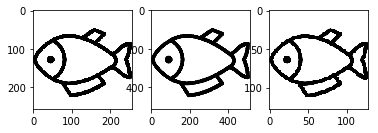

In [8]:
# 예제 5-3 cv2.resize()로 확대와 축소(scale_resize.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(dst2)
plt.subplot(133)
plt.imshow(dst3)
plt.show()

cv2.resize()함수를 활용한 영상 확대 및 축소

## 5.1.3 회전

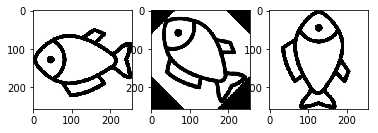

In [9]:
# 예제 5-4 변환행렬로 회전(rotate_matrix.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('img/fish.jpg')
rows,cols = img.shape[0:2]

# ---① 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# ---② 회전을 위한 변환 행렬 생성
m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
                    [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
                    [np.sin(d90), np.cos(d90), 0]])

# ---③ 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# ---④ 결과 출력
cv2.imshow("origin", img)
cv2.imshow("45", r45)
cv2.imshow("90", r90)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(r45)
plt.subplot(133)
plt.imshow(r90)
plt.show()

cv2.warpAffine() 함수를 통해 영상을 2*3 변환행렬을 가지고 회전

(각도를 60진법에서 호도법으로 변환, 삼각함수, 회전축 반영 필요)

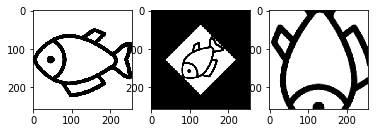

In [10]:
# 예제 5-5 회전 변환행렬 구하기(rotate_getmatrix.py)

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/fish.jpg')
rows,cols = img.shape[0:2]

#---① 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1.5) 

#---② 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

#---③ 결과 출력
cv2.imshow('origin',img)
cv2.imshow("45", img45)
cv2.imshow("90", img90)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(img45)
plt.subplot(133)
plt.imshow(img90)
plt.show()

cv2.getRotationMatrix2D() 함수를 통해 회전을 위한 변환행렬을 간단하게 구할 수 있음

## 5.2 뒤틀기

### 5.2.1 어핀 변환

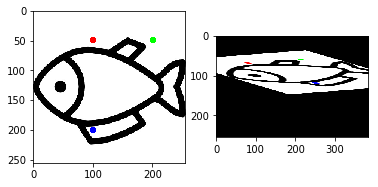

In [11]:
# 예제 5-6 어핀 변환(getAffine.py)

import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = 'img/fish.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img, (100,50), 5, (255,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,200), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

cv2.getAffineTransform() 함수로 변환 전/후의 3개의 점을 짝지어 매핑한 좌표로 변환행렬 계산

### 5.2.2 원근 변환

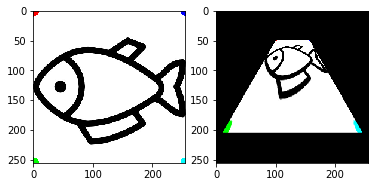

In [12]:
# 예제 5-7 원근 변환(perspective.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

file_name = "img/fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

cv2.imshow("origin", img)
cv2.imshow('perspective', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)
plt.show()

cv2.getPerspectiveTransform() 함수를 통해 변환 전/후의 4개의 점을 짝지어 매핑한 좌표로 변환행렬 계산

원근 변환은 cv2.warpPerspective()라는 함수를 통해 수행

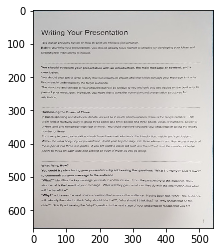

In [13]:
# 예제 5-8 마우스와 원근 변환으로 문서 스캔 효과 내기(perspective_scan.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = "scanning"
img = cv2.imread("img/paper.jpg")
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  #마우스 이벤트 콜백 함수 구현 ---① 
    global  pts_cnt                     # 마우스로 찍은 좌표의 갯수 저장
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]            # 마우스 좌표 저장
        pts_cnt+=1
        if pts_cnt == 4:                       # 좌표가 4개 수집됨 
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
            topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
            w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
            w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
            h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
            h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
            width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이
            
            # 변환 후 4개 좌표
            pts2 = np.float32([[0,0], [width-1,0], 
                                [width-1,height-1], [0,height-1]])

            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (width, height))
            cv2.imshow('scanned', result)
            plt.imshow(result)
            plt.show()
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④
cv2.waitKey(0)
cv2.destroyAllWindows()

마우스 이벤트를 이용해 4개의 좌표를 받아 시계방향으로 4개의 좌표를 정렬해서 원근 변환 수행하는 예제 코드

### 5.2.3 삼각형 어핀 변환

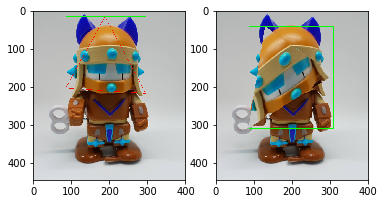

In [14]:
# 예제 5-9 삼각형 어핀 변환(triangle_affine.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/taekwonv1.jpg")
img2 = img.copy()
draw = img.copy()

# 변환 전,후 삼각형 좌표 ---①
pts1 = np.float32([[188,14], [85,202], [294,216]])
pts2 = np.float32([[128,40], [85,307], [306,167]])

# 각 삼각형을 완전히 감싸는 사각형 좌표 구하기 ---②
x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

# 사각형을 이용한 관심영역 설정 ---③
roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

# 관심영역을 기준으로 좌표 계산 ---④
offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

# 관심 영역을 주어진 삼각형 좌표로 어핀 변환 ---⑤
mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)

# 어핀 변환 후 삼각형만 골라 내기 위한 마스크 생성 ---⑥
mask = np.zeros((h2, w2), dtype = np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

# 삼각형 영역만 마스킹해서 합성 ---⑦
warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

# 관심 영역과 삼각형에 선 그려서 출력 ---⑧
cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
cv2.imshow('origin', draw)
cv2.imshow('warped triangle', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(121)
plt.imshow(draw)
plt.subplot(122)
plt.imshow(img2)
plt.show()

영상에 임의의 삼각형을 지정해서 그 삼각형만 아핀 변환하는 예제

영상처리에서 어떤 영역을 여러 개의 삼각형으로 나누어 입체적인 표현이나 모핑 기술에 사용함